In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
def A1(name,sheet, cols):
    data=pd.read_excel(name, sheet_name=sheet, usecols=cols)
    return data

In [18]:
def dimen(matrix):
    return matrix.shape

In [19]:
def X(quantity,cost):
    return np.linalg.pinv(quantity)@cost

In [20]:
def classify_rich_poor(cost):
    a=[]
    for i in cost:
        if i>200:
            a.append(1)
        else:    
            a.append(0)
    return a

In [21]:
if __name__ == "__main__":
    data = A1("Lab Session Data.xlsx","Purchase data", [1,2,3,4])
    table=data
    print(table)
    col= data.columns
    data = data.to_numpy()
    quantity = data[0:10,[0,1,2]]
    cost = data[:,3]
    print("Dimention of the data is "+str(dimen(data)))
    print("Number of vextors in the data is "+ str(len(data)))
    print("Rank of matrix quantity is "+str(np.linalg.matrix_rank(quantity)))
    print("Items: "+str(col[0]+" "+col[1]+" "+col[2]))
    print("Price: "+str((X(quantity,cost))))
    
    test_classify = classify_rich_poor(cost)
    Y = np.linalg.pinv(quantity)@test_classify
    find_classify = quantity@Y
    for i,j in enumerate(find_classify):
        find_classify[i]=round(j)
    print(test_classify)
    print("Classification: "+str(find_classify))
    print(table)




   Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)
0           20             6                 2           386
1           16             3                 6           289
2           27             6                 2           393
3           19             1                 2           110
4           24             4                 2           280
5           22             1                 5           167
6           15             4                 2           271
7           18             4                 2           274
8           21             1                 4           148
9           16             2                 4           198
Dimention of the data is (10, 4)
Number of vextors in the data is 10
Rank of matrix quantity is 3
Items: Candies (#) Mangoes (Kg) Milk Packets (#)
Price: [ 1. 55. 18.]
[1, 1, 1, 0, 1, 0, 1, 1, 0, 0]
Classification: [1. 1. 1. 0. 1. 0. 1. 1. 0. 0.]
   Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)
0           20       

Mean of the irctc stock price is Rs.1560.6634538152598
Variance of the irctc stock price is Rs.58496.49239931618
Mean of the irctc stock price on wednesday is Rs.1550.7060000000001
Mean of the irctc stock price in April is Rs.1698.9526315789474
Probability of making a loss over the stock price is 0.4979919678714859
Probability of making a profit on wednesday is 0.42
Conditional probability of making a profit on wednesday given that the day is wednesday is 0.42


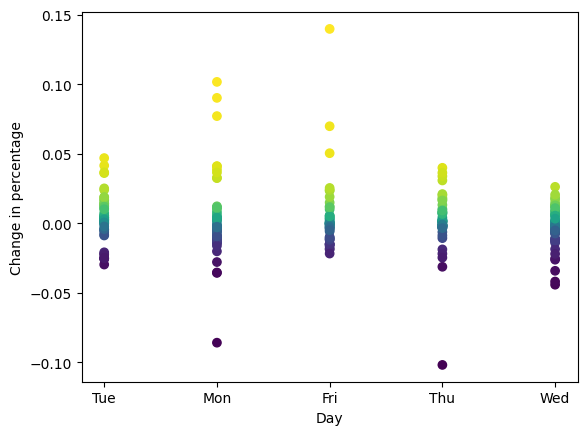

In [22]:
irctc_data = A1("Lab Session Data.xlsx","IRCTC Stock Price", [0,1,2,3,4,5,6,7,8])
table= irctc_data
irctc_data = irctc_data.to_numpy()
price= irctc_data[:,3]
print("Mean of the irctc stock price is Rs."+str(np.mean(price)))
print("Variance of the irctc stock price is Rs."+str(np.var(price)))

wednesday= table[table["Day"]=="Wed"]
wednesday_mean= np.mean(wednesday["Price"])

print("Mean of the irctc stock price on wednesday is Rs."+str(wednesday_mean))

april_mean= np.mean(table[table["Month"]=="Apr"]["Price"])
print("Mean of the irctc stock price in April is Rs."+str(april_mean))

change = table["Chg%"].to_numpy()
neg_change = table[table["Chg%"]<0]["Chg%"]
print("Probability of making a loss over the stock price is "+str(len(neg_change)/len(change)))

wed_prof = wednesday[wednesday["Chg%"]>0]["Chg%"]
print("Probability of making a profit on wednesday is "+str(len(wed_prof)/len(wednesday)))

cond_wed_prob = len(wednesday[wednesday["Chg%"]>0])/len(wednesday)
print("Conditional probability of making a profit on wednesday given that the day is wednesday is "+str(cond_wed_prob))

plt.scatter(y = table["Chg%"], x = table["Day"], cmap="viridis", c=table["Chg%"].astype("category").cat.codes)
plt.xlabel("Day")
plt.ylabel("Change in percentage")
plt.show()

In [25]:
thyroid = A1("Lab Session Data.xlsx","thyroid0387_UCI", "A:AE")
col= thyroid.columns
datatype = ["Nominal", "Numeric", "Nominal", "Nominal", "Nominal","Nominal","Nominal","Nominal","Nominal","Nominal","Nominal","Nominal","Nominal","Nominal","Nominal","Nominal","Nominal","Nominal", "Numeric", "Nominal", "Numeric", "Nominal", "Numeric", "Nominal", "Numeric","Nominal", "Numeric", "Nominal", "Numeric", "Nominal","Ordinal"]
print("Data type of the columns are as follows: ")
for i,j in zip(col,datatype):
    if j=="Nominal":
        print(i+" : "+j+" (One hot encoding)")
    elif j=="Ordinal":
        print(i+" : "+j+" (Label encoding)")
    else:
        print(i+" : "+j)

Data type of the columns are as follows: 
Record ID : Nominal (One hot encoding)
age : Numeric
sex : Nominal (One hot encoding)
on thyroxine : Nominal (One hot encoding)
query on thyroxine : Nominal (One hot encoding)
on antithyroid medication : Nominal (One hot encoding)
sick : Nominal (One hot encoding)
pregnant : Nominal (One hot encoding)
thyroid surgery : Nominal (One hot encoding)
I131 treatment : Nominal (One hot encoding)
query hypothyroid : Nominal (One hot encoding)
query hyperthyroid : Nominal (One hot encoding)
lithium : Nominal (One hot encoding)
goitre : Nominal (One hot encoding)
tumor : Nominal (One hot encoding)
hypopituitary : Nominal (One hot encoding)
psych : Nominal (One hot encoding)
TSH measured : Nominal (One hot encoding)
TSH : Numeric
T3 measured : Nominal (One hot encoding)
T3 : Numeric
TT4 measured : Nominal (One hot encoding)
TT4 : Numeric
T4U measured : Nominal (One hot encoding)
T4U : Numeric
FTI measured : Nominal (One hot encoding)
FTI : Numeric
TBG mea

In [26]:
cat_col=[]
num_col=[]
for i,j in enumerate(col):
    if datatype[i]=="Numeric":
        num_col.append(j)
    else:  
        cat_col.append(j)



In [64]:
print("Data ranges of numeric data")

for i in num_col:
    thyroid[i] = pd.to_numeric(thyroid[i])

for i in num_col:
    print(i + " : " + str(thyroid[i].min()) + " - " + str(thyroid[i].max()))


Data ranges of numeric data
age : 1 - 65526
TSH : 0.005 - 530.0
T3 : 0.05 - 18.0
TT4 : 2.0 - 600.0
T4U : 0.17 - 2.33
FTI : 1.4 - 881.0
TBG : 0.1 - 200.0


In [42]:
for i in cat_col:
    thyroid[i] = thyroid[i].replace('?', np.NaN)

print(thyroid.isnull().sum())

Record ID                       0
age                             0
sex                           307
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           842
T3 measured                     0
T3                           2604
TT4 measured                    0
TT4                           442
T4U measured                    0
T4U                           809
FTI measured                    0
FTI                           802
TBG measured                    0
TBG                          8823
referral sourc

In [47]:

from scipy import stats
for i in num_col:
    z_score = np.abs(stats.zscore(thyroid[i].dropna()))
    outlier_indices = np.where(z_score>3)[0]
    if len(outlier_indices) >= 0:
        print(i + ": Number of outliers found: " + str(len(outlier_indices)))

age: Number of outliers found: 3
TSH: Number of outliers found: 100
T3: Number of outliers found: 86
TT4: Number of outliers found: 101
T4U: Number of outliers found: 172
FTI: Number of outliers found: 95
TBG: Number of outliers found: 11


In [48]:
print("Mean and variance for numeric columns")
for i in num_col:
    print(i + " : Mean: " + str(thyroid[i].mean()) + " Variance: " + str(thyroid[i].var()))

Mean and variance for numeric columns
age : Mean: 73.55582206716092 Variance: 1401800.868871345
TSH : Mean: 5.218402753781513 Variance: 584.8661532092907
T3 : Mean: 1.970628805724726 Variance: 0.7877961683561557
TT4 : Mean: 108.70030469644902 Variance: 1407.950791475485
T4U : Mean: 0.9760557216309935 Variance: 0.04014430639006457
FTI : Mean: 113.64074551935484 Variance: 1726.5395850611546
TBG : Mean: 29.87005729512894 Variance: 444.3876429994665


In [68]:
imputed_thyroid = thyroid.copy()
for i,j in enumerate(datatype):
    col_name = col[i]
    if j == "Nominal" or j == "Ordinal":
        imputed_thyroid[col_name] = imputed_thyroid[col_name].fillna(imputed_thyroid[col_name].mode()[0])
    else:
        imputed_thyroid[col_name] = imputed_thyroid[col_name].fillna(imputed_thyroid[col_name].median())

print("Imputed data")
print(imputed_thyroid)

Imputed data
      Record ID  age sex on thyroxine query on thyroxine  \
0     840801013   29   F            f                  f   
1     840801014   29   F            f                  f   
2     840801042   41   F            f                  f   
3     840803046   36   F            f                  f   
4     840803047   32   F            f                  f   
...         ...  ...  ..          ...                ...   
9167  870119022   56   M            f                  f   
9168  870119023   22   M            f                  f   
9169  870119025   69   M            f                  f   
9170  870119027   47   F            f                  f   
9171  870119035   31   M            f                  f   

     on antithyroid medication sick pregnant thyroid surgery I131 treatment  \
0                            f    f        f               f              f   
1                            f    f        f               f              f   
2                            